In [48]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv('/home/elias/Documentos/VSCode/Ciência_de_ Dados/Projetos/Titanic/ML/titanic_clean')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Total_parents
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,Adult,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Adult,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,Adult,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Adult,0


In [50]:
#Número binário, para a coluna sexo
def sex(df):
    if df == 'male':
        return 0
    else:
        return 1
    
# 0= "Homem"; 1= "Mulher"

df['Sex'] = df['Sex'].apply(sex)

In [51]:
#Aplicando a mesma com a coluna "Age_group"

def faixa(df):
    if df == 'Child':
        return 0
    elif df == 'Adult':
        return 1
    else:
        return 0
    
df['Age_group'] = df['Age_group'].apply(faixa)

In [52]:
#Tirando as colunas, que precisa para o modelo

df_model = df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Total_parents','SibSp','Fare', 'Parch'])
df_model

,Survived,Pclass,Sex,Age,Age_group
0,0,3,0,22,1
1,1,1,1,38,1
2,1,3,1,26,1
3,1,1,1,35,1
4,0,3,0,35,1
...,...,...,...,...,...
886,0,2,0,27,1
887,1,1,1,19,1
888,0,3,1,21,1
889,1,1,0,26,1


In [53]:
# Treinando o modelo

X = df_model[['Pclass','Sex','Age','Age_group']]
y = df_model['Survived'] #0:Não sobreviveu; 1:Sobreviveu

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LogisticRegression()
lr.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [76]:
# Avaliando o modelo

y_pred = lr.predict(X_test)
acuracia = accuracy_score(y_test,y_pred)
precisao = precision_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f'MODELO AVALIADO\n================\nAcurácia: {acuracia:.2%}\n================\nPrecisão: {precisao:.2%}\n================\nF1 Score: {f1:.2%}')

MODELO AVALIADO
Acurácia: 81.01%
Precisão: 80.30%
F1 Score: 75.71%


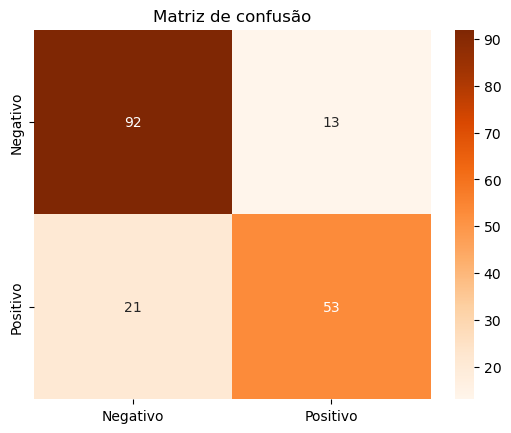

In [94]:
cm = confusion_matrix(y_test,y_pred)
plt.title("Matriz de confusão")
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['Negativo','Positivo'],yticklabels=['Negativo','Positivo'],cmap='Oranges')
plt.show()

Com a matriz de confusão criada, chegamos a coclusão de que há erros no modelo, mas são poucos, então para considerar esse modelo

In [ ]:
# Testando novos dados

test = [[3,1,35,2]]
lr.predict_proba(test).round(2) * 100 #[chance de não sobreviver, chance de sobreviver]

/home/elias/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[59., 41.]])

Nesse resultado, ela tem 41% de chance de sobreviver

In [57]:
#Salvando e carregando o modelo

joblib.dump(lr,'titanic_model.joblib')
model = joblib.load('titanic_model.joblib')

In [90]:
#Criando uma função para mostrar o resultado

def pred(data):
    y_pred = model.predict_proba(data)
    
    for i in range(len(data)):
        classe = data.iloc[i,0]
        sexo = 'Homem' if data.iloc[i,1]==0 else 'Mulher'
        idade = data.iloc[i,2]
        sobreviveu = y_pred[i,1]
        
        print(f'\nPASSAGEIRO N°{i+1}\n----------------------------\nSexo: {sexo}\nClasse: {classe}\nIdade: {idade}\n============================\nCHANCE DE SOBREVIVER: {sobreviveu:.2%}\n============================\n')

In [67]:
# Criando uma tabela genérica, para prever novos dados

dicio = {'Pclass':[1,3],'Sex':[0,1],'Age':[10,50],'Age_group':[0,1]}
df_new = pd.DataFrame(dicio)
df_new

,Pclass,Sex,Age,Age_group
0,1,0,10,0
1,3,1,50,1


In [91]:
pred(df_new)


PASSAGEIRO N°1
----------------------------
Sexo: Homem
Classe: 1
Idade: 10
CHANCE DE SOBREVIVER: 66.60%


PASSAGEIRO N°2
----------------------------
Sexo: Mulher
Classe: 3
Idade: 50
CHANCE DE SOBREVIVER: 40.50%

